In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import pingouin as pg
import statsmodels

In [18]:
# импорт данных
task_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/stat_lesson5/5_task_1.csv')
task_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/stat_lesson5/5_task_2.csv')
task_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [19]:
# Эксперимент 1, однофакторный дисперсионный
# проверка на гомогенность для task1
pg.homoscedasticity(data = task_1, dv = 'events', group = 'group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [20]:
a = task_1.query('group == "A"').events
b = task_1.query('group == "B"').events
c = task_1.query('group == "C"').events
scipy.stats.levene(a, b, c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [21]:
# проверка на нормальность выборок из task1
pg.normality(data = task_1, dv = 'events', group = 'group', method = 'normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


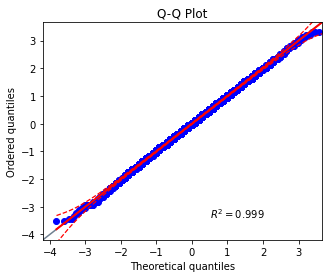

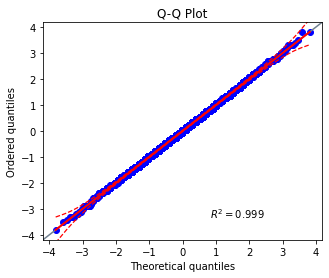

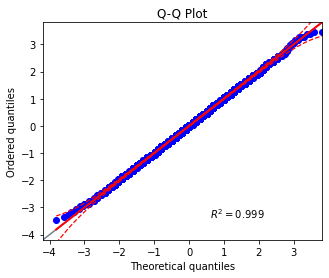

In [22]:
# стоим qq-plot для выборок
pg.qqplot(a)
pg.qqplot(b)
pg.qqplot(c)

In [23]:
# проводим дисперсионный анализ
stats.f_oneway(a, b, c) # a, b, c - переменные с данными трёх групп

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [24]:
#  проверяем между какими группами есть стат.значимые отличия с помощью критерия Тьюки
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

print(pairwise_tukeyhsd(task_1.events, task_1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'Заказы')

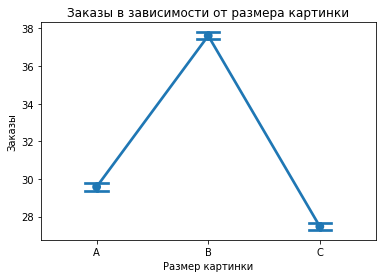

In [25]:
# построим графики и определимся с наилушим вариантом картинки
sns.pointplot(x = 'group', y = 'events', data = task_1, capsize = .2)
plt.title('Заказы в зависимости от размера картинки')
plt.xlabel('Размер картинки')
plt.ylabel('Заказы')

In [26]:
#  Эксперимент 2, многофакторный дисперсионнный
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


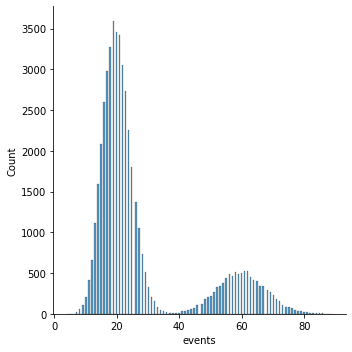

In [27]:
# распеределение контрольной группы
control_group = task_2.query('group == "control"')
sns.displot(control_group, x = 'events')

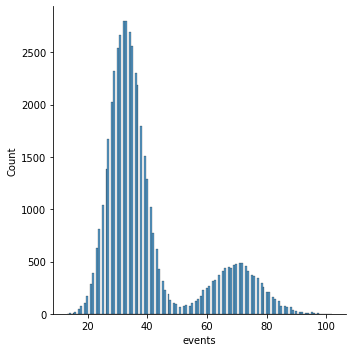

In [28]:
# распеределение тестовой группы
test_group = task_2.query('group == "test"')
sns.displot(test_group, x = 'events')

In [29]:
# Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 
task_2 \
    .groupby(['group', 'segment'], as_index = False) \
    .agg({'events' : ['mean', 'median', 'std']})

group segment     events                 
                         mean median       std
0  control    high  59.970800   60.0  7.805347
1  control     low  20.031575   20.0  4.473576
2     test    high  69.938500   70.0  8.403974
3     test     low  33.025925   33.0  5.720845

In [30]:
# многофакторный дисперсионный

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'task_2.events ~ task_2.group + task_2.segment + task_2.group:task_2.segment'
model = ols(formula, task_2).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
task_2.group,3.837195e+06,1.0,112031.864119,0.000000e+00
task_2.segment,2.362480e+07,1.0,689756.377484,0.000000e+00
task_2.group:task_2.segment,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [40]:
task_2['combination'] = task_2.group + '/' + task_2.segment


print(pairwise_tukeyhsd(task_2.events, task_2.combination))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


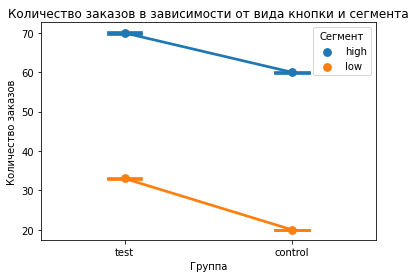

In [42]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = task_2, capsize = .2)
plt.title('Количество заказов в зависимости от вида кнопки и сегмента')
plt.xlabel('Группа')
plt.ylabel('Количество заказов')
plt.legend(title = 'Сегмент')